In [1]:
%%capture
# Run data treatment fron another notebook:
%run treat.ipynb


In [2]:
#split the dataset to use available information to predict the nulls
salario_train_df = treated_df[~treated_df['salario_mensal'].isnull()]
target = salario_train_df["salario_mensal"]


In [3]:
#split for validation
X_train, X_valid, y_train, y_valid = train_test_split(salario_train_df[train_salario_cols], target, 
                                                      test_size = 0.3, random_state= 0)


## Linear regression

In [4]:
#positive = True
reg = LassoCV(cv = 10 ,random_state=0).fit(X_train, y_train)

score: 0.3649404293633568


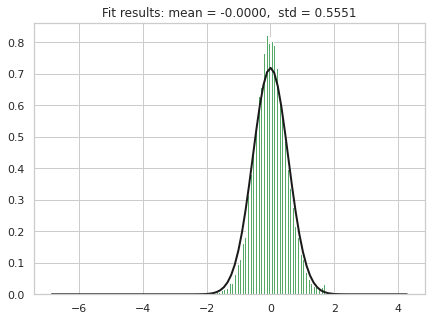

In [5]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_valid)
error = y_train_pred - y_train

plot_histogram(error, dofit= True)
print("score: "+ str(reg.score(X_train, y_train)))

### Evaluation of Regression Model
<ul>
    <li> Evaluation Metrics:
        <ul>
            <li>   
               R$^2$ Score : $$ R^2 =  1 - \frac{\sum(y_{true} - y_{pred})^2}{\sum (y_{true} - y_{mean})^2} $$ 
            </li><br>
            <li> MSE:  $$ MSE =  \frac{1}{N} \sum(y_{true} - y_{pred})^2$$ 
            </li><br>
            <li> RMSE: $$ RMSE = \sqrt{ \frac{1}{N} \sum(y_{true} - y_{pred})^2 }$$ 
            </li>
        </ul>
    </li><br>
    <li>
        Cross-Validation:
    </li>
</ul>

In [6]:
#cross-validation folds
kfolds = KFold(n_splits=10, shuffle=True, random_state=0)

#cross-validated RMSE:
rmse_train= np.sqrt(-cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error",cv=kfolds))
rmse_validation= np.sqrt(-cross_val_score(reg, X_valid, y_valid, scoring="neg_mean_squared_error",cv=kfolds))

print("RMSE on Training set :", rmse_train.mean())
print("RMSE on Validation set :", rmse_validation.mean())

RMSE on Training set : 0.5552248250956222
RMSE on Validation set : 0.5494146560564144


## Cluster Methods (cluster mean/meadian)

#### 1) DBSCAN

In [7]:
treated_df['dbs_mean_salario'] = treated_df.groupby(["dbs_cluster"])["salario_mensal"].transform("mean")
treated_df['dbs_median_salario'] = treated_df.groupby(["dbs_cluster"])["salario_mensal"].transform("median")
treated_df

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,numero_de_dependentes_woe,linhas_crdto_woe,idade_woe,dbs_cluster,dbs_mean_salario,dbs_median_salario
0,1,1.272786,45,-3.183204,-0.335085,9.118335,13,0.244364,3.052115,0.230682,2.0,-1.325038,0.121186,-0.617109,-1,8.586710,8.597297
1,0,1.818610,40,0.419302,-0.520353,7.863651,4,0.244364,-1.011087,0.230682,1.0,-0.571118,0.068652,-0.780943,0,8.274306,8.299037
2,0,0.964345,38,-1.718280,-0.533364,8.020599,2,-4.092256,-1.011087,0.230682,0.0,0.782540,-0.723433,-0.780943,37,8.141147,8.160804
3,0,-0.248231,30,0.419302,-0.551432,8.101981,5,0.244364,-1.011087,0.230682,0.0,0.782540,0.072355,-1.070336,0,8.274306,8.299037
4,0,1.675995,49,-1.718280,-0.555648,11.060196,7,0.244364,0.004714,0.230682,0.0,0.782540,0.228828,-0.525463,1,8.539786,8.556606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,0,-0.523721,59,-1.718280,-0.420460,9.169623,10,0.244364,1.020514,0.230682,0.0,0.782540,0.121186,0.223515,25,8.764407,8.800481
109996,0,-0.124923,46,0.419302,-0.409203,9.411238,19,0.244364,3.052115,0.230682,4.0,-2.020337,-0.044356,-0.617109,4,9.290187,9.314024
109997,0,-0.398392,43,0.419302,-0.438744,9.392745,13,0.244364,1.020514,0.230682,2.0,-1.325038,0.121186,-0.780943,5,8.927317,8.962007
109998,0,-0.808588,86,0.419302,-0.478716,8.853808,14,0.244364,1.020514,0.230682,1.0,-0.571118,-0.044356,1.927467,5,8.927317,8.962007


<AxesSubplot:>

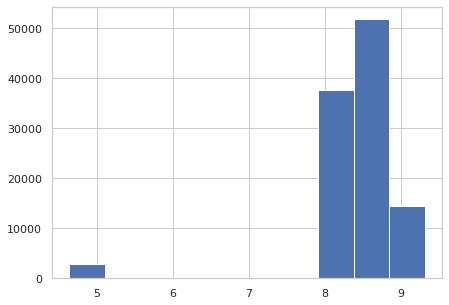

In [8]:
treated_df["dbs_median_salario"].hist()

In [9]:
df_metrics  = treated_df[~treated_df['salario_mensal'].isnull()]

print("score (mean method): ", metrics.r2_score(df_metrics["salario_mensal"], df_metrics["dbs_mean_salario"]))
print("score (median method): ", metrics.r2_score(df_metrics["salario_mensal"], df_metrics["dbs_median_salario"]))
print("RMSE  (mean method) on Training set :", np.sqrt(metrics.mean_squared_error(df_metrics["salario_mensal"], df_metrics["dbs_mean_salario"])))
print("RMSE  (median method) on Training set :", np.sqrt(metrics.mean_squared_error(df_metrics["salario_mensal"], df_metrics["dbs_median_salario"])))


score (mean method):  0.14636858094119498
score (median method):  0.14497116467412052
RMSE  (mean method) on Training set : 0.6440520192660553
RMSE  (median method) on Training set : 0.6445789684360166


#### 2) KMeans

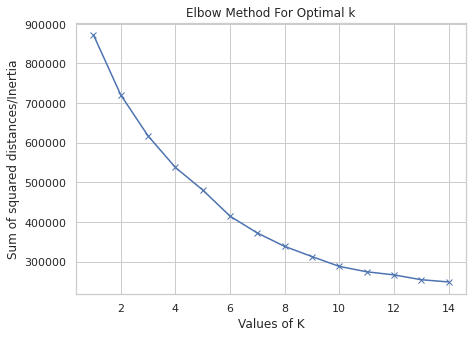

In [10]:
kmean_vars = train_salario_cols + ["inadimplente"]
Sum_of_squared_distances = []
K = range(1,15)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(treated_df[kmean_vars])
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
kmean_cluster = KMeans(n_clusters=12, random_state = 0).fit(treated_df[kmean_vars])


treated_df["km_cluster"] = kmean_cluster.labels_
treated_df['km_mean_salario'] = treated_df.groupby(["km_cluster"])["salario_mensal"].transform("mean")
treated_df['km_median_salario'] = treated_df.groupby(["km_cluster"])["salario_mensal"].transform("median")
treated_df[kmean_vars]

,util_linhas_inseguras,vezes_passou_de_30_59_dias,razao_debito,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes_woe,idade_woe,inadimplente
0,1.272786,-3.183204,-0.335085,0.244364,3.052115,0.230682,-1.325038,-0.617109,1
1,1.818610,0.419302,-0.520353,0.244364,-1.011087,0.230682,-0.571118,-0.780943,0
2,0.964345,-1.718280,-0.533364,-4.092256,-1.011087,0.230682,0.782540,-0.780943,0
3,-0.248231,0.419302,-0.551432,0.244364,-1.011087,0.230682,0.782540,-1.070336,0
4,1.675995,-1.718280,-0.555648,0.244364,0.004714,0.230682,0.782540,-0.525463,0
...,...,...,...,...,...,...,...,...,...
109995,-0.523721,-1.718280,-0.420460,0.244364,1.020514,0.230682,0.782540,0.223515,0
109996,-0.124923,0.419302,-0.409203,0.244364,3.052115,0.230682,-2.020337,-0.617109,0
109997,-0.398392,0.419302,-0.438744,0.244364,1.020514,0.230682,-1.325038,-0.780943,0
109998,-0.808588,0.419302,-0.478716,0.244364,1.020514,0.230682,-0.571118,1.927467,0


In [12]:
df_metrics  = treated_df[~treated_df['salario_mensal'].isnull()]

print("score (mean method): ", metrics.r2_score(df_metrics["salario_mensal"], df_metrics["km_mean_salario"]))
print("score (median method): ", metrics.r2_score(df_metrics["salario_mensal"], df_metrics["km_median_salario"]))
print("RMSE  (mean method) on Training set :", np.sqrt(metrics.mean_squared_error(df_metrics["salario_mensal"], df_metrics["km_mean_salario"])))
print("RMSE  (median method) on Training set :", np.sqrt(metrics.mean_squared_error(df_metrics["salario_mensal"], df_metrics["km_median_salario"])))


score (mean method):  0.09165291692368127
score (median method):  0.0889044988750387
RMSE  (mean method) on Training set : 0.6643725240905253
RMSE  (median method) on Training set : 0.6653768727187759


### Replace missing values

In [13]:
salario_pred_df = treated_df[treated_df['salario_mensal'].isnull()]

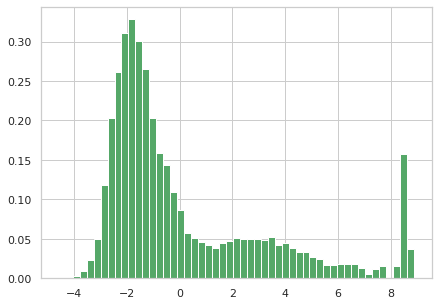

In [14]:
#using regression:
pred = reg.predict(salario_pred_df[train_salario_cols])
#using cluster mean:
#pred = salario_pred_df["dbs_mean_salario"]

plot_histogram((pd.Series(pred)))

treated_df.loc[treated_df['salario_mensal'].isnull(),('salario_mensal')] = pred


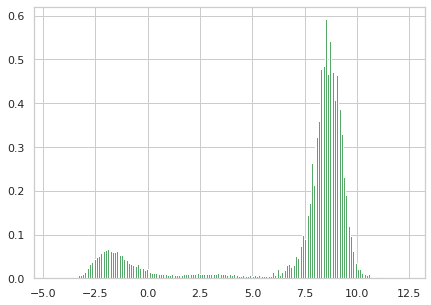

In [15]:
plot_histogram(treated_df["salario_mensal"])

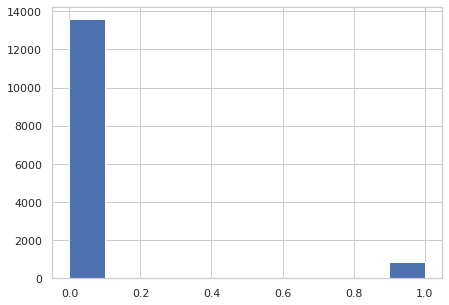

In [16]:
treated_df[treated_df["salario_mensal"]<0]["inadimplente"].hist()
plt.show()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[61, 23, 53, 25, 26, 27, 28, 29, 60, 22, 31, 5...",62331,0.576163,62326,5,0.000080,6.798127,4.193400,0.211573
1,"[0, 12]",34014,0.314412,33005,1009,0.029664,0.855131,0.160731,0.019501
2,"[30, 37, -1, 33, 6, 58, 57, 9, 55, 15, 45, 52,...",11838,0.109426,5596,6242,0.527285,-2.741817,2.206635,0.212748
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,108183,1.000000,100927,7256,0.067072,,6.560767,0.443822


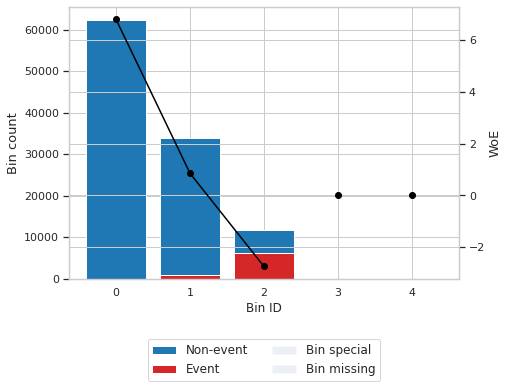

None

In [17]:
col = 'dbs_cluster'  
optb = optbinning.OptimalBinning(dtype='categorical')  
optb.fit(treated_df[col], treated_df['inadimplente'])  
binning_table = optb.binning_table  
display(binning_table.build())  
display(binning_table.plot(metric="woe"))  
plt.show()

In [18]:
treated_df["dbs_cluster_woe"] = optb.transform(treated_df["dbs_cluster"], metric="woe")
#traincols.append("dbs_cluster")
traincols.append("dbs_cluster_woe")

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[8],15731,0.145411,15594,137,0.008709,2.102092,0.285100,0.030252
1,[11],5983,0.055304,5914,69,0.011533,1.818402,0.089261,0.009837
2,[1],16249,0.150199,15993,256,0.015755,1.50216,0.185036,0.021174
3,[3],16661,0.154008,16338,323,0.019387,1.291028,0.151521,0.017725
4,[4],8822,0.081547,8560,262,0.029698,0.853942,0.041592,0.005047
5,[0],10183,0.094128,9839,344,0.033782,0.720899,0.036101,0.004417
6,[2],7493,0.069262,6932,561,0.074870,-0.118386,0.001022,0.000128
7,[9],7516,0.069475,6902,614,0.081692,-0.212997,0.003458,0.000431
8,[6],10008,0.092510,8689,1319,0.131795,-0.747385,0.071516,0.008737
9,"[5, 7, 10]",9537,0.088156,6166,3371,0.353465,-2.028728,0.818566,0.087741


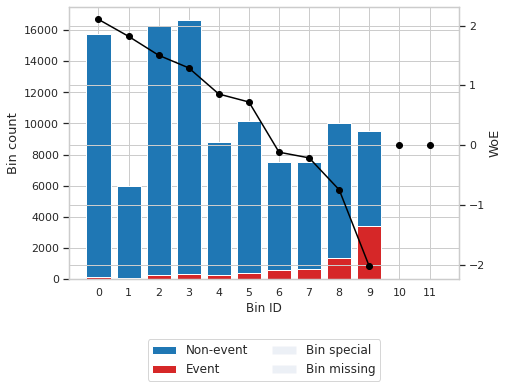

None

In [19]:
col = 'km_cluster'  
optb = optbinning.OptimalBinning(dtype='categorical')  
optb.fit(treated_df[col], treated_df['inadimplente'])  
binning_table = optb.binning_table  
display(binning_table.build())  
display(binning_table.plot(metric="woe"))  
plt.show()

In [20]:
treated_df["km_cluster_woe"] = optb.transform(treated_df["km_cluster"], metric="woe")
traincols.append("km_cluster_woe")

## Classification by Logistic regression: 

In [21]:
treated_df[traincols] = scaler.fit_transform(treated_df[traincols])

In [22]:
treated_df[traincols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108183 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   util_linhas_inseguras                  108183 non-null  float64
 1   vezes_passou_de_30_59_dias             108183 non-null  float64
 2   razao_debito                           108183 non-null  float64
 3   salario_mensal                         108183 non-null  float64
 4   numero_vezes_passou_90_dias            108183 non-null  float64
 5   numero_emprestimos_imobiliarios        108183 non-null  float64
 6   numero_de_vezes_que_passou_60_89_dias  108183 non-null  float64
 7   numero_de_dependentes_woe              108183 non-null  float64
 8   idade_woe                              108183 non-null  float64
 9   dbs_cluster_woe                        108183 non-null  float64
 10  km_cluster_woe                         108183 non-null  

In [23]:
tmp = treated_df[traincols + ["inadimplente"]].dropna()
target = tmp["inadimplente"]

In [24]:
#split for validation
X_train, X_valid, y_train, y_valid = train_test_split(tmp[traincols], target, 
                                                      test_size = 0.3, random_state= 0)


### Using class weights:

Loss function of Logistic regression:
$$ LogLoss = \frac{1}{N} \sum_i -y_{true} log(y_{pred}) - (1-y_{true}) log(1-y_{pred})  + regularization$$

Loss function of <b> wieghed</b> Logistic regression:

$$ w_i = \frac{N_{total} }{2 \cdot n_i} $$

$$ LogLoss = \frac{1}{N} \sum_i - w_0 \cdot y_{true} log(y_{pred}) - w_1 \cdot (1-y_{true}) log(1-y_{pred}) + regularization $$


In [25]:
clf = LogisticRegressionCV(cv=5, random_state=0, solver = "saga", penalty = 'l1' , class_weight = 'balanced').fit(X_train, y_train)

print("accuracy: ", clf.score(X_train, y_train))
print("accuracy: ", clf.score(X_valid, y_valid))

accuracy:  0.9202804774984154
accuracy:  0.9226005238021876


#### Cross-Validation

<ul>
    <li> We have to be carefull with overfit because the dataset is imbalanced -> stratified k-fold cross validation     </li>
    
</ul>

In [26]:
skf = StratifiedKFold(n_splits=5)

#scores = cross_val_score(clf, treated_df[traincols], treated_df["inadimplente"], cv = skf)
#scores

In [27]:
def plot_confusion_matrix(y_true, y_pred, title = "Confusion Matrix"):
    conf_mat = metrics.confusion_matrix(y_true, y_pred)  
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))  
    sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax1)  
    sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', ax=ax2)  


    ax1.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax2.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax1.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax2.yaxis.set_ticklabels(['Negative', 'Positive'])

    ax1.set_ylabel("True Value", fontsize=14, labelpad=20)
    ax2.set_ylabel("True Value", fontsize=14, labelpad=20)
    ax1.yaxis.set_ticklabels(['Negative', 'Positive'])
    ax2.xaxis.set_ticklabels(['Negative', 'Positive'])

    fig.suptitle(title, fontsize=14)
    fig.tight_layout(pad=1.0)
    plt.show()  

    print("\n")

### Evaluation Metrics In Classification

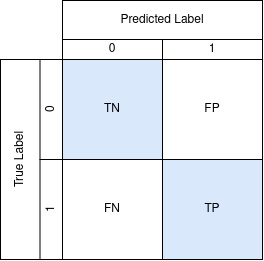

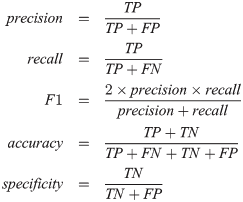

In [28]:
y_train_pred = clf.predict(X_train)  
y_valid_pred = clf.predict(X_valid)    

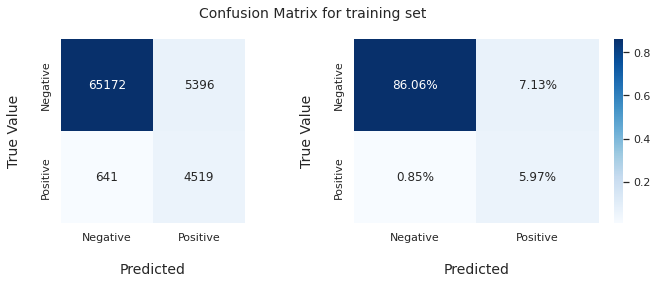

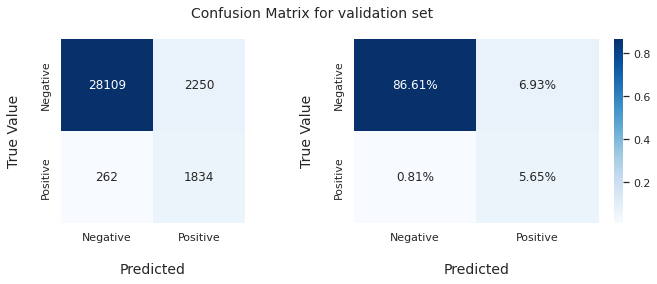

In [29]:
plot_confusion_matrix(y_train,y_train_pred, "Confusion Matrix for training set")
plot_confusion_matrix(y_valid,y_valid_pred, "Confusion Matrix for validation set")

In [30]:
metrics.precision_score(y_train,y_train_pred)

0.4557740796772567

In [31]:
metrics.recall_score(y_train,y_train_pred)

0.8757751937984496

In [32]:
print(metrics.classification_report(y_train, y_train_pred, labels=[0, 1]))  

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     70568
           1       0.46      0.88      0.60      5160

    accuracy                           0.92     75728
   macro avg       0.72      0.90      0.78     75728
weighted avg       0.95      0.92      0.93     75728



In [33]:
model_ROCs = {"wlogistic": {"train": {},"valid": {}, "format": "r"}, 
              "SMOTElogistic": {"train": {},"valid": {}, "format": "g"}, 
              "BaggingForest": {"train": {},"valid": {}, "format": "b"}, 
              "BoostForest": {"train": {},"valid": {}, "format": "k"}
             } 

In [34]:
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]  
y_valid_pred_prob = clf.predict_proba(X_valid)[:, 1]  

Train Threshold value is: 0.49266397715071975
Valid Threshold value is: 0.49266397715071975


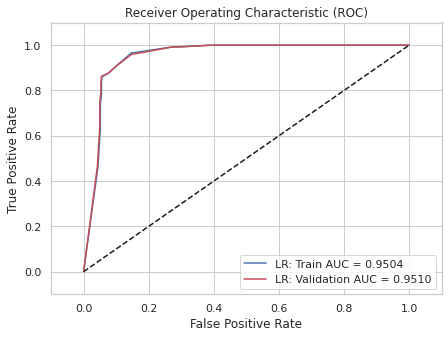

In [35]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred_prob)  
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)  
optimal_threshold = thresholds[optimal_idx]  
auc_score = metrics.auc(false_positive_rate, true_positive_rate)  
print("Train Threshold value is:", optimal_threshold)  
      
false_positive_rate1, true_positive_rate1, thresholds = metrics.roc_curve(y_valid, y_valid_pred_prob)  
optimal_idx = np.argmax(true_positive_rate1 - false_positive_rate1)  
optimal_threshold1 = thresholds[optimal_idx]  
auc_score1 = metrics.auc(false_positive_rate1, true_positive_rate1)  
print("Valid Threshold value is:", optimal_threshold1)  
      
model_ROCs["wlogistic"]["train"] = {"fpr": false_positive_rate, "tpr": true_positive_rate, "auc": auc_score}
model_ROCs["wlogistic"]["valid"] = {"fpr": false_positive_rate1, "tpr": true_positive_rate1, "auc": auc_score1}   
    
plt.title('Receiver Operating Characteristic (ROC)')  
plt.plot(false_positive_rate, true_positive_rate, 'b', label='LR: Train AUC = {0:.4f}'.format(auc_score))  
plt.plot(false_positive_rate1, true_positive_rate1, 'r', label='LR: Validation AUC = {0:.4f}'.format(auc_score1))  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1],'k--')  
plt.xlim([-0.1, 1.1])  
plt.ylim([-0.1, 1.1])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()  

In [36]:
y_train_pred_opt = (y_train_pred_prob > optimal_threshold).astype(int)  
y_valid_pred_opt = (y_valid_pred_prob > optimal_threshold).astype(int)  

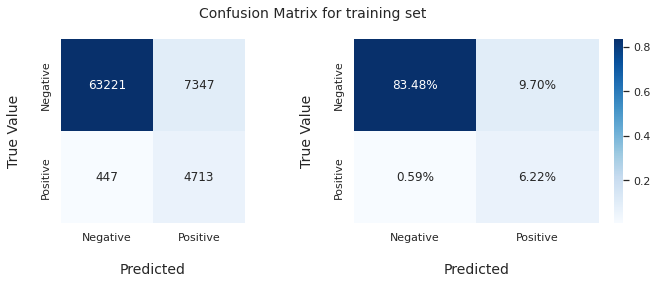

In [37]:
plot_confusion_matrix(y_train,y_train_pred_opt, "Confusion Matrix for training set")

In [38]:
print(metrics.classification_report(y_train, y_train_pred_opt, labels=[0, 1])) 

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     70568
           1       0.39      0.91      0.55      5160

    accuracy                           0.90     75728
   macro avg       0.69      0.90      0.74     75728
weighted avg       0.95      0.90      0.92     75728



In [39]:
print(metrics.classification_report(y_valid, y_valid_pred_opt, labels=[0, 1])) 

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     30359
           1       0.38      0.91      0.53      2096

    accuracy                           0.90     32455
   macro avg       0.69      0.90      0.74     32455
weighted avg       0.95      0.90      0.92     32455



### Using synthetic data

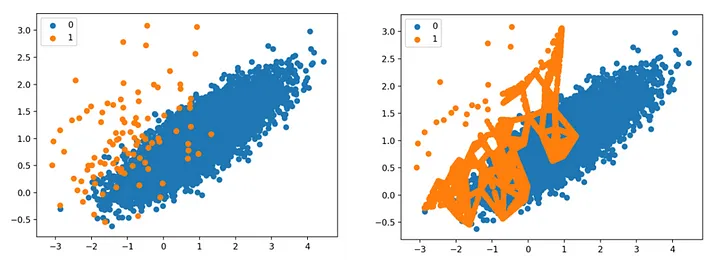

In [40]:
sm = BorderlineSMOTE(random_state=0,k_neighbors=10,sampling_strategy = 0.2)

X_res, y_res = sm.fit_resample(X_train, y_train)

<AxesSubplot:>

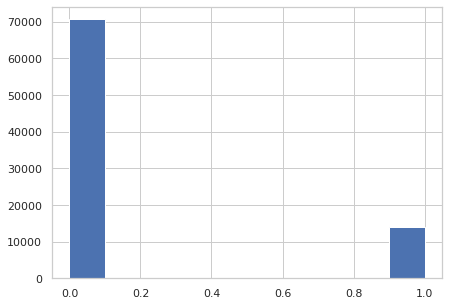

In [41]:
y_res.hist()

In [42]:
clf2 = LogisticRegressionCV(cv=5, random_state=0, class_weight = 'balanced').fit(X_res, y_res)
print("accuracy: ", clf2.score(X_train, y_train))
print("accuracy: ", clf2.score(X_valid, y_valid))

accuracy:  0.8963659412634692
accuracy:  0.8965336619935295


In [43]:
y_train_pred_prob2 = clf2.predict_proba(X_train)[:, 1]  
y_valid_pred_prob2 = clf2.predict_proba(X_valid)[:, 1]  

Train Threshold value is: 0.5599517342842316
Valid Threshold value is: 0.4376440500642668


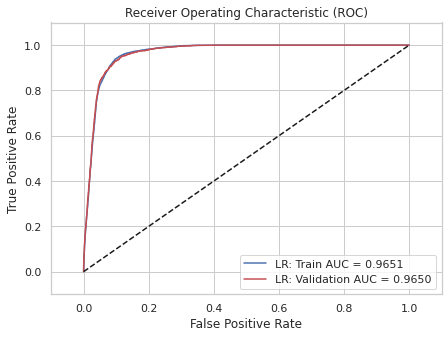

In [44]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred_prob2)  
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)  
optimal_threshold = thresholds[optimal_idx]  
auc_score = metrics.auc(false_positive_rate, true_positive_rate)  
print("Train Threshold value is:", optimal_threshold)  
      
false_positive_rate1, true_positive_rate1, thresholds = metrics.roc_curve(y_valid, y_valid_pred_prob2)  
optimal_idx = np.argmax(true_positive_rate1 - false_positive_rate1)  
optimal_threshold1 = thresholds[optimal_idx]  
auc_score1 = metrics.auc(false_positive_rate1, true_positive_rate1)  
print("Valid Threshold value is:", optimal_threshold1) 

model_ROCs["SMOTElogistic"]["train"] = {"fpr": false_positive_rate, "tpr": true_positive_rate, "auc": auc_score}
model_ROCs["SMOTElogistic"]["valid"] = {"fpr": false_positive_rate1, "tpr": true_positive_rate1, "auc": auc_score1}  
      
plt.title('Receiver Operating Characteristic (ROC)')  
plt.plot(false_positive_rate, true_positive_rate, 'b', label='LR: Train AUC = {0:.4f}'.format(auc_score))  
plt.plot(false_positive_rate1, true_positive_rate1, 'r', label='LR: Validation AUC = {0:.4f}'.format(auc_score1))  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1],'k--')  
plt.xlim([-0.1, 1.1])  
plt.ylim([-0.1, 1.1])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()  

In [45]:
y_train_pred_opt2 = (y_train_pred_prob2 > optimal_threshold).astype(int)  
y_valid_pred_opt2 = (y_valid_pred_prob2 > optimal_threshold).astype(int)  


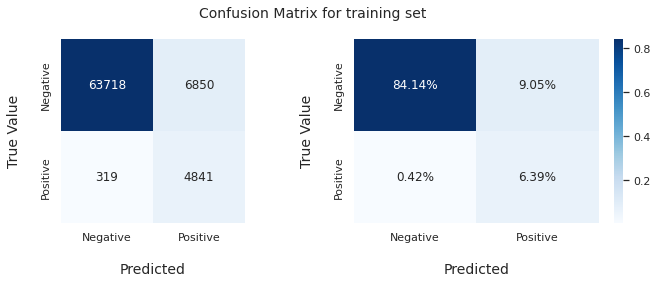

In [46]:
plot_confusion_matrix(y_train,y_train_pred_opt2, "Confusion Matrix for training set")

In [47]:
print(metrics.classification_report(y_train, y_train_pred_opt2, labels=[0, 1]))  

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     70568
           1       0.41      0.94      0.57      5160

    accuracy                           0.91     75728
   macro avg       0.70      0.92      0.76     75728
weighted avg       0.96      0.91      0.92     75728



In [48]:
print(metrics.classification_report(y_valid, y_valid_pred_opt2, labels=[0, 1]))  

              precision    recall  f1-score   support

           0       0.99      0.90      0.95     30359
           1       0.40      0.93      0.56      2096

    accuracy                           0.91     32455
   macro avg       0.70      0.92      0.75     32455
weighted avg       0.96      0.91      0.92     32455



In [49]:
#Cross validation:
#scores = cross_val_score(clf, treated_df[traincols], treated_df["inadimplente"], cv = skf)
#scores

## Classification by Decision Trees: 

### Using Bagging classifier + synthetic data

##### Bagging:

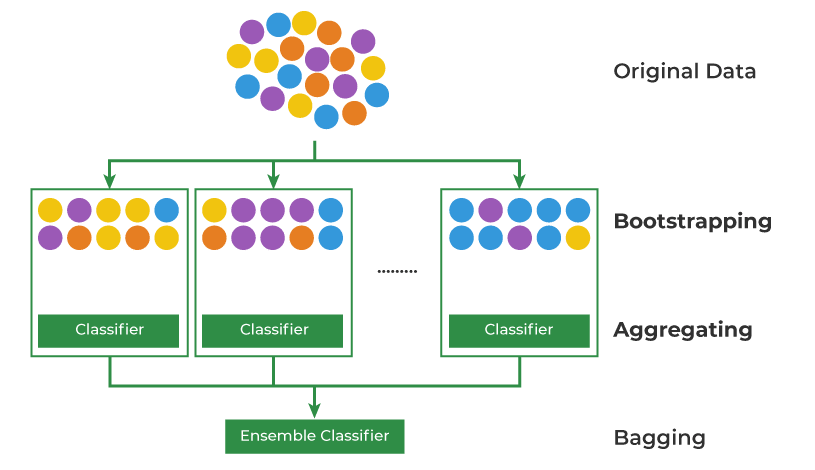

In [50]:
#base_estimator = DecisionTreeClassifier(max_features='auto')
#base_estimator = LogisticRegression()
#bagging_clf = BalancedBaggingClassifier(estimator=base_estimator,n_estimators = 100, sampling_strategy='auto', random_state=2)

bagging_clf = BalancedRandomForestClassifier(n_estimators = 200, replacement = True,min_samples_split = 0.002 , sampling_strategy = 'all')


bagging_clf.fit(X_res, y_res)

print("accuracy: ", bagging_clf.score(X_train, y_train))
print("accuracy: ", bagging_clf.score(X_valid, y_valid))


accuracy:  0.9099012254384111
accuracy:  0.9096595285780311


In [51]:
y_train_pred_prob3 = bagging_clf.predict_proba(X_train)[:, 1]  
y_valid_pred_prob3 = bagging_clf.predict_proba(X_valid)[:, 1]  

Train Threshold value is: 0.5166841790558727
Valid Threshold value is: 0.44909801398961186


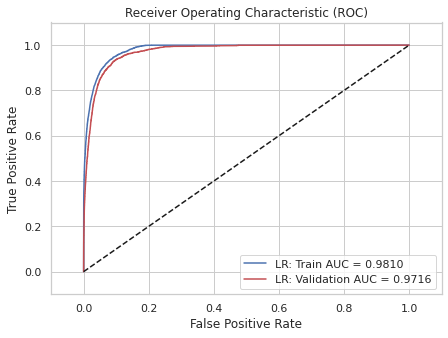

In [52]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred_prob3)  
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)  
optimal_threshold = thresholds[optimal_idx]  
auc_score = metrics.auc(false_positive_rate, true_positive_rate)  
print("Train Threshold value is:", optimal_threshold)  
      
false_positive_rate1, true_positive_rate1, thresholds = metrics.roc_curve(y_valid, y_valid_pred_prob3)  
optimal_idx = np.argmax(true_positive_rate1 - false_positive_rate1)  
optimal_threshold1 = thresholds[optimal_idx]  
auc_score1 = metrics.auc(false_positive_rate1, true_positive_rate1)  
print("Valid Threshold value is:", optimal_threshold1)

model_ROCs["BaggingForest"]["train"] = {"fpr": false_positive_rate, "tpr": true_positive_rate, "auc": auc_score}
model_ROCs["BaggingForest"]["valid"] = {"fpr": false_positive_rate1, "tpr": true_positive_rate1, "auc": auc_score1} 
      
plt.title('Receiver Operating Characteristic (ROC)')  
plt.plot(false_positive_rate, true_positive_rate, 'b', label='LR: Train AUC = {0:.4f}'.format(auc_score))  
plt.plot(false_positive_rate1, true_positive_rate1, 'r', label='LR: Validation AUC = {0:.4f}'.format(auc_score1))  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1],'k--')  
plt.xlim([-0.1, 1.1])  
plt.ylim([-0.1, 1.1])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()  

In [53]:
y_train_pred_opt3 = (y_train_pred_prob3 > optimal_threshold).astype(int)  
y_valid_pred_opt3 = (y_valid_pred_prob3 > optimal_threshold).astype(int)  

In [54]:
y_train_pred3 = bagging_clf.predict(X_train)    
y_valid_pred3 = bagging_clf.predict(X_valid)

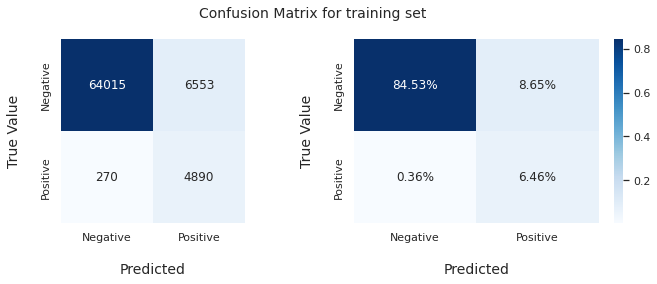

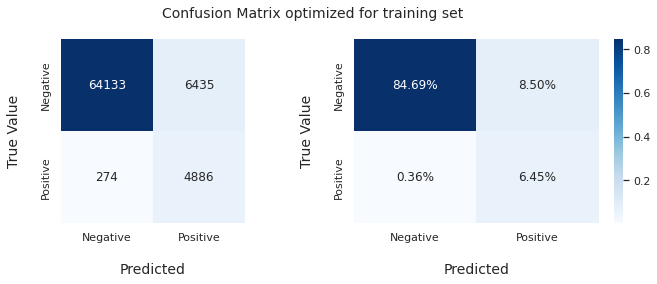

In [55]:
plot_confusion_matrix(y_train,y_train_pred3, "Confusion Matrix for training set")
plot_confusion_matrix(y_train,y_train_pred_opt3, "Confusion Matrix optimized for training set")
#plot_confusion_matrix(y_valid,y_valid_pred3, "Confusion Matrix for validation set")

In [56]:
print(metrics.classification_report(y_train, y_train_pred_opt3, labels=[0, 1]))  

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     70568
           1       0.43      0.95      0.59      5160

    accuracy                           0.91     75728
   macro avg       0.71      0.93      0.77     75728
weighted avg       0.96      0.91      0.93     75728



In [57]:
print(metrics.classification_report(y_valid, y_valid_pred_opt3, labels=[0, 1]))  

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     30359
           1       0.42      0.93      0.57      2096

    accuracy                           0.91     32455
   macro avg       0.70      0.92      0.76     32455
weighted avg       0.96      0.91      0.93     32455



In [58]:
#Cross validation:
#scores = cross_val_score(clf, treated_df[traincols], treated_df["inadimplente"], cv = skf)
#scores

### Using Random under-sampling (RUS) Boost

#### Boosting:

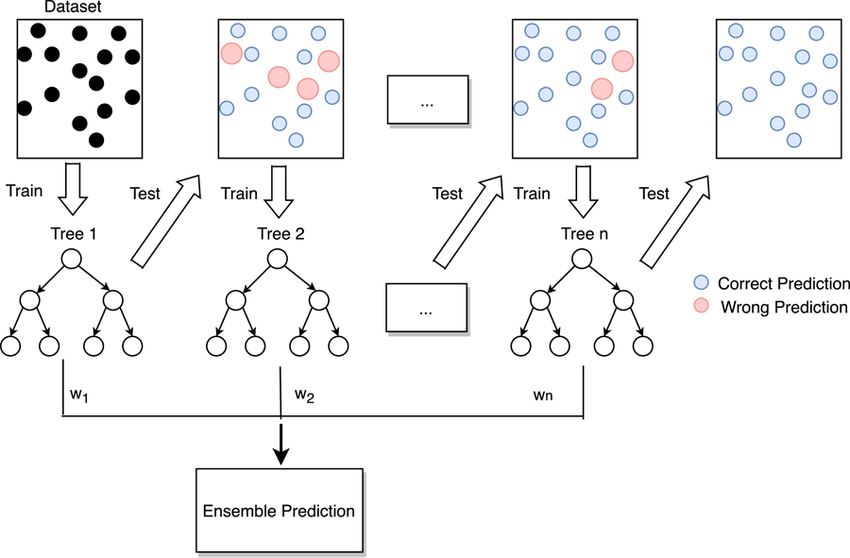

In [59]:
base_estimator = DecisionTreeClassifier(max_features='auto',max_depth=3)


RUS_clf = RUSBoostClassifier(estimator = base_estimator, learning_rate = 0.2, n_estimators = 200, random_state = 0, replacement = True, sampling_strategy = 'auto')


RUS_clf.fit(X_res, y_res)

print("accuracy: ", RUS_clf.score(X_train, y_train))
print("accuracy: ", RUS_clf.score(X_valid, y_valid))


accuracy:  0.9184317557574477
accuracy:  0.9167770759513172


In [60]:
y_train_pred_prob4 = RUS_clf.predict_proba(X_train)[:, 1]  
y_valid_pred_prob4 = RUS_clf.predict_proba(X_valid)[:, 1]  

Train Threshold value is: 0.4941116897206749
Valid Threshold value is: 0.49375498829887693


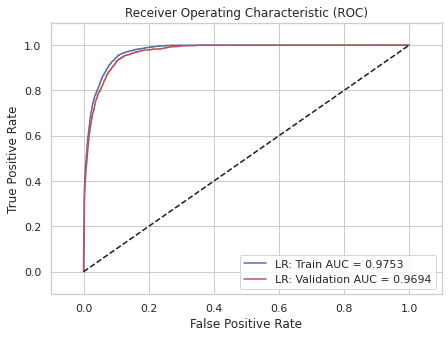

In [61]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred_prob4)  
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)  
optimal_threshold = thresholds[optimal_idx]  
auc_score = metrics.auc(false_positive_rate, true_positive_rate)  
print("Train Threshold value is:", optimal_threshold)  
      
false_positive_rate1, true_positive_rate1, thresholds = metrics.roc_curve(y_valid, y_valid_pred_prob4)  
optimal_idx = np.argmax(true_positive_rate1 - false_positive_rate1)  
optimal_threshold1 = thresholds[optimal_idx]  
auc_score1 = metrics.auc(false_positive_rate1, true_positive_rate1)  
print("Valid Threshold value is:", optimal_threshold1)

model_ROCs["BoostForest"]["train"] = {"fpr": false_positive_rate, "tpr": true_positive_rate, "auc": auc_score}
model_ROCs["BoostForest"]["valid"] = {"fpr": false_positive_rate1, "tpr": true_positive_rate1, "auc": auc_score1}
      
plt.title('Receiver Operating Characteristic (ROC)')  
plt.plot(false_positive_rate, true_positive_rate, 'b', label='LR: Train AUC = {0:.4f}'.format(auc_score))  
plt.plot(false_positive_rate1, true_positive_rate1, 'r', label='LR: Validation AUC = {0:.4f}'.format(auc_score1))  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1],'k--')  
plt.xlim([-0.1, 1.1])  
plt.ylim([-0.1, 1.1])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()  

In [62]:
y_train_pred_opt4 = (y_train_pred_prob4 > optimal_threshold).astype(int)  
y_valid_pred_opt4 = (y_valid_pred_prob4 > optimal_threshold).astype(int)  

In [63]:
y_train_pred4 = RUS_clf.predict(X_train)    
y_valid_pred4 = RUS_clf.predict(X_valid)

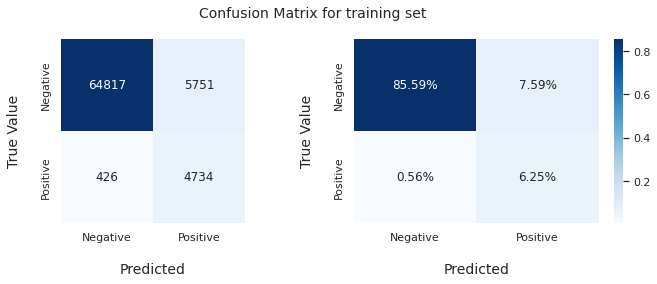

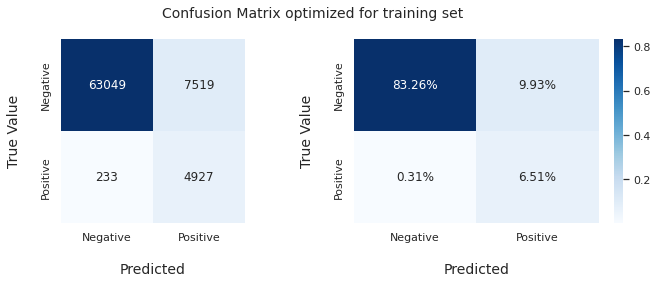

In [64]:
plot_confusion_matrix(y_train,y_train_pred4, "Confusion Matrix for training set")
plot_confusion_matrix(y_train,y_train_pred_opt4, "Confusion Matrix optimized for training set")
#plot_confusion_matrix(y_valid,y_valid_pred3, "Confusion Matrix for validation set")

In [65]:
print(metrics.classification_report(y_train, y_train_pred_opt4, labels=[0, 1]))  

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     70568
           1       0.40      0.95      0.56      5160

    accuracy                           0.90     75728
   macro avg       0.70      0.92      0.75     75728
weighted avg       0.96      0.90      0.92     75728



In [66]:
print(metrics.classification_report(y_valid, y_valid_pred_opt4, labels=[0, 1]))  

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     30359
           1       0.38      0.93      0.54      2096

    accuracy                           0.90     32455
   macro avg       0.69      0.91      0.74     32455
weighted avg       0.96      0.90      0.92     32455



In [67]:
#Cross validation:
#scores = cross_val_score(clf, treated_df[traincols], treated_df["inadimplente"], cv = skf)
#scores

# Compare all model ROC Curves and PR CURVES

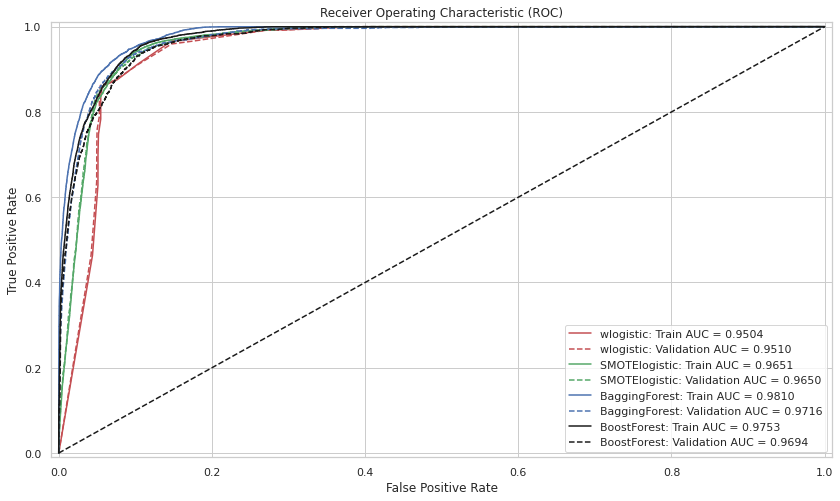

In [68]:
plt.figure(figsize=(14,8))
plt.title('Receiver Operating Characteristic (ROC)')  

for key, value in model_ROCs.items():
    plt.plot(value["train"]["fpr"], value["train"]["tpr"], value["format"], label= key + ': Train AUC = {0:.4f}'.format(value["train"]["auc"]))
    plt.plot(value["valid"]["fpr"], value["valid"]["tpr"], "--" + value["format"], label= key + ': Validation AUC = {0:.4f}'.format(value["valid"]["auc"]))
    
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1],'k--')  
plt.xlim([-0.01, 1.01])  
plt.ylim([-0.01, 1.01])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()  

# Creating a score system

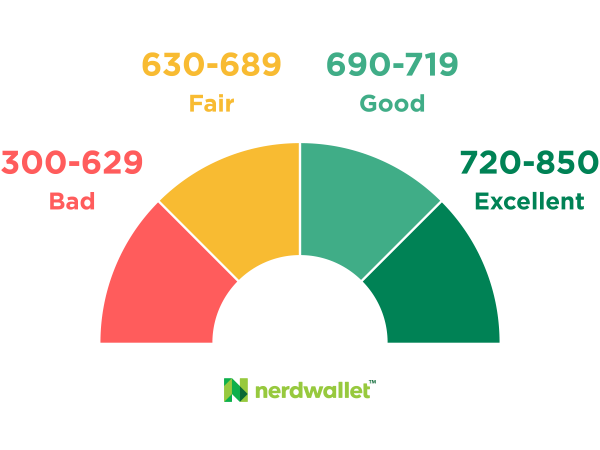

"<i>There are various scales in use in the industry. One of the most common is a scorecard with discrete scores scaled logarithmically, with the odds doubling at every 20 points</i>".

"<i>In general, the relationship between odds and scores can be presented as a linear transformation:</i> " 

$$odds = \frac{p_{good}}{1-p_{good}}$$<br>
$$Score = Offset + \frac{pdo}{log(2)}*log(odds)$$<br>

reference: Credit Risk Scorecards: Developing and Implementing Intelligent Credit Scoring, by Naeem Siddiqi

In [69]:
full_probs = bagging_clf.predict_proba(treated_df[traincols])


full_probs

array([[0.04594729, 0.95405271],
       [0.25781806, 0.74218194],
       [0.0745247 , 0.9254753 ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.22382114, 0.77617886]])

In [70]:
offset = 400
pdo = 20
lg2 = np.log(2)
scores = []
for probs in full_probs:
    scores.append(offset + (pdo/lg2) * np.log(probs[0]/(1.00001 - probs[0]) ))

In [71]:
treated_df["score"] = scores

<AxesSubplot:xlabel='score', ylabel='Count'>

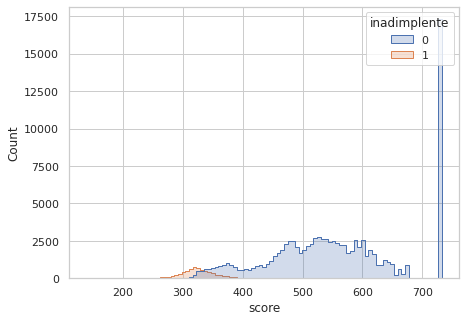

In [72]:
sns.histplot(treated_df, x="score", hue="inadimplente", element="step")